In [1]:
from utility import * # import from our own utility script for helper functions
import numpy as np
import keras
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy
from keras.models import model_from_json
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

Using TensorFlow backend.


# import demo testset

In [2]:
data_test = np.load('assets/images_test.npy')
label_test = np.load("assets/labels_test.npy")

## convert label (1-5) to one hot code

In [3]:
label_test_one_hot = label_to_one_hot(label_test)

## reshape image arrays to N x size x size x 3

In [4]:
size = 100
data_test = data_test.reshape((data_test.shape[0], size, size, 3))

## normalize image arrays to 0 - 1 

In [5]:
data_test = normalize_data(data_test)

# Display images from test set


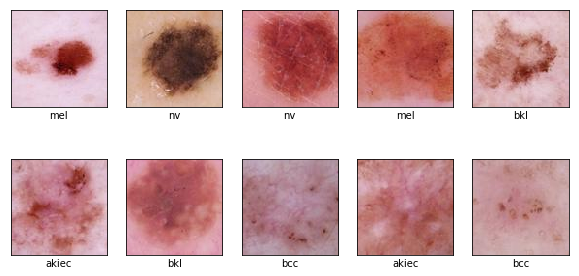

In [6]:
classes = {1: 'nv', 2: 'mel', 3: 'bkl', 4: 'bcc', 5: 'akiec'}

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)

    plt.imshow(data_test[i])

    plt.xlabel(classes[int(label_test[i])])
    plt.xticks([])
    plt.yticks([])

# import VGG-13 model and parameters

In [7]:
# load model architecture
json_file = open('assets/vgg13_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

# load model parameters into model
VGG13_loaded_model = model_from_json(loaded_model_json)
VGG13_loaded_model.load_weights("assets/vgg13_model.h5")
print("Loaded model from disk")
 
def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

# evaluate loaded model on test data
# optimizer: AdaDelta
# loss: categorical_crossentropy
# metrics: accuracy and top_2_accuracy
VGG13_loaded_model.compile(optimizer='AdaDelta', loss='categorical_crossentropy', metrics=['accuracy', top_2_accuracy])

Loaded model from disk


## evaluate model on test set

In [8]:
score, acc, top2 = VGG13_loaded_model.evaluate(data_test, label_test_one_hot)
print('Test score:', score)
print('Test accuracy:', acc)
print('Top-2 accuracy:', top2)

10/10 [==============================] - 1s 142ms/step
Test score: 1.8622491359710693
Test accuracy: 0.699999988079071
Top-2 accuracy: 0.800000011920929


## prediction vs. ground truth

In [9]:
prediction = VGG13_loaded_model.predict(data_test)

In [10]:
print("      predicted:", prediction.argmax(axis=1)+1)
print("ground truth:",(label_test).astype(int).T[0])

      predicted: [1 1 1 1 3 5 3 4 3 4]
ground truth: [2 1 1 2 3 5 3 4 5 4]


In [11]:
label_true = label_test
label_pred = prediction.argmax(axis=1) + 1 # increment because our classes start at 1 - 5
confusion_matrix = metrics.confusion_matrix(y_true=label_true, y_pred=label_pred)  # shape=(12, 12)

Text(0.5, 1.0, 'Normalized Confusion Matrix')

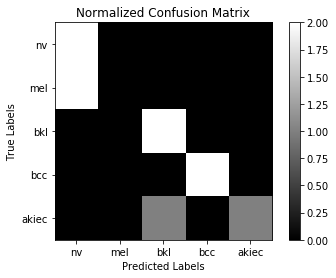

In [12]:
plt.imshow(confusion_matrix, cmap='gray')
plt.xticks(np.arange(5), list(classes.values()))
plt.xlabel("Predicted Labels")
plt.yticks(np.arange(5), list(classes.values()))
plt.ylabel("True Labels")
plt.colorbar()
plt.title("Normalized Confusion Matrix")